<a href="https://colab.research.google.com/github/Kevin-Heidorn/Analise-de-Dados-UFBA-/blob/main/completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # array and vector manipulation
import pandas as pd # data manipulation

import seaborn as sns
from matplotlib.cbook import boxplot_stats
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from joblib import Parallel, delayed
import multiprocessing as mp


from sklearn.preprocessing import StandardScaler
import math

# loading the necessary functions
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay



In [ ]:
#carregando os dados
infarto= pd.read_csv('heart.csv')

infarto


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
#Verificação do tamanho da matriz
infarto.shape


(303, 14)

In [ ]:
#Informações dos atributos
infarto.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#Nomes dos atributos (colunas)
infarto.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
#renomear
#infarto.rename(columns={'age': 'idade'})
#infarto.rename(columns={'sex': 'sexo'})
#infarto.rename(columns={'cp': 'peito dor'})
#infarto.rename(columns={'trestbps': 'pressão(Hg)'})
#infarto.rename(columns={'chol': 'colesterol(mg/dl)'})
#infarto.rename(columns={'fbs': 'glicemia'})
#infarto.rename(columns={'restecg': 'Eletrocardi '})
#infarto.rename(columns={'thalach': 'FCM '}) #Frequência Cardíaca Máxima
#infarto.rename(columns={'oldpeak': 'TE '}) #teste ergométrico
#infarto.rename(columns={'slope': 'SL'})
#infarto.rename(columns={'': 'SL'})

















<Axes: ylabel='Frequency'>

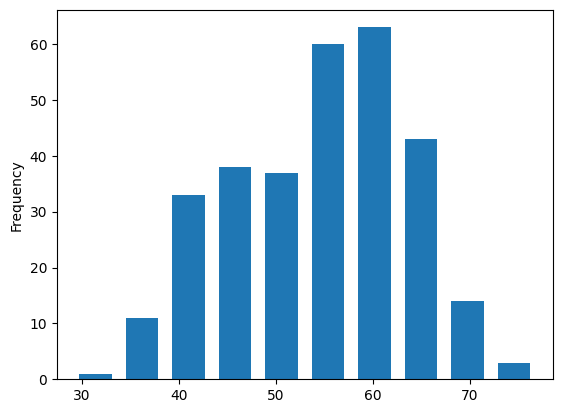

In [ ]:
#Plot do histograma de um atributo
infarto['age'].plot.hist(rwidth=0.7)

<Axes: ylabel='Frequency'>

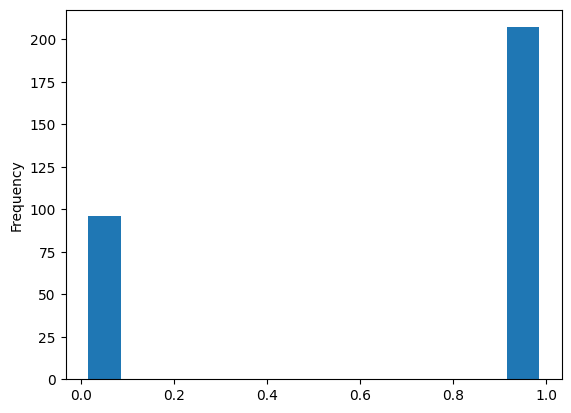

In [ ]:
#Plot do histograma de um atributo
infarto['sex'].plot.hist(rwidth=0.7)

<Axes: ylabel='Frequency'>

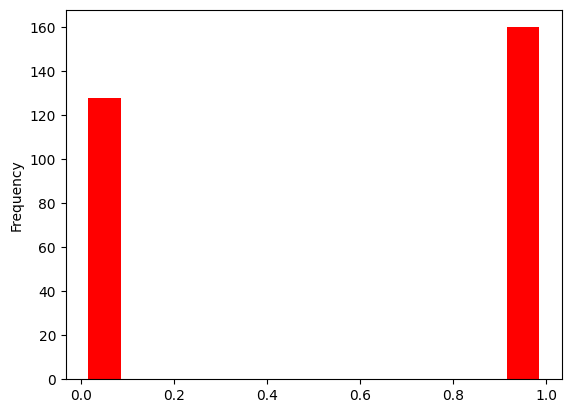

In [ ]:
#Plot do histograma de um atributo
infarto['target'].plot.hist(rwidth=0.7, color='red')

<Axes: ylabel='Frequency'>

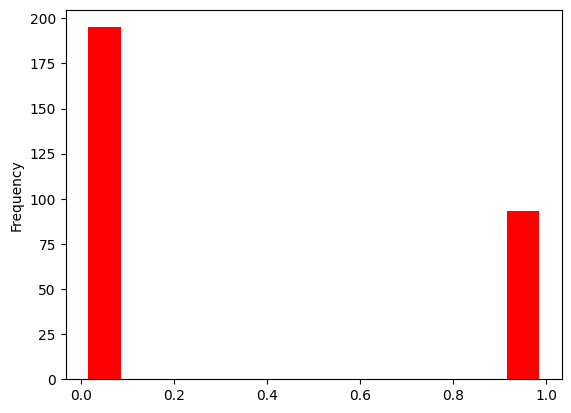

In [ ]:
infarto['exang'].plot.hist(rwidth=0.7, color='red')


<Axes: ylabel='Frequency'>

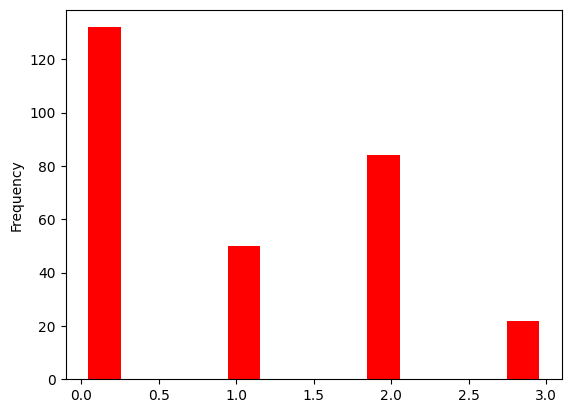

In [ ]:
infarto['cp'].plot.hist(rwidth=0.7, color='red')


<Axes: ylabel='Frequency'>

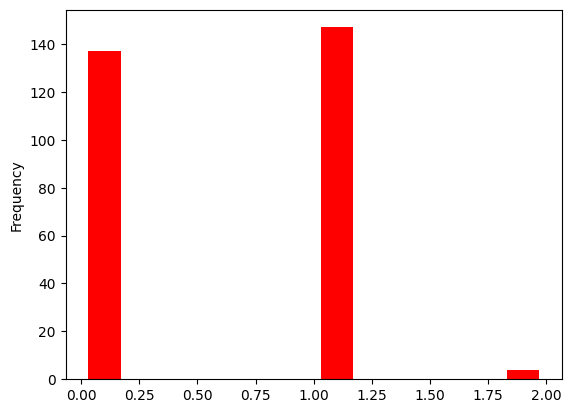

In [ ]:
 infarto['restecg'].plot.hist(rwidth=0.7, color='red')


<Axes: ylabel='Frequency'>

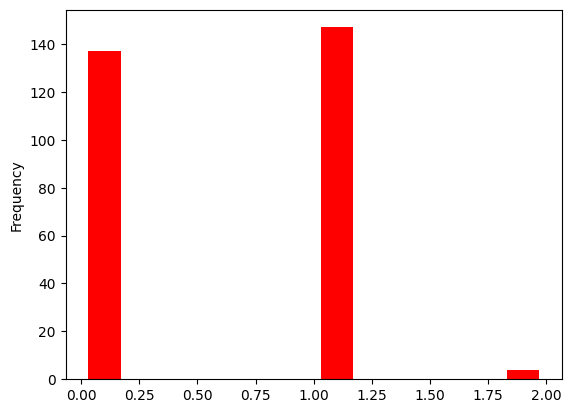

In [ ]:
 infarto['restecg'].plot.hist(rwidth=0.7, color='red')


<Axes: ylabel='Frequency'>

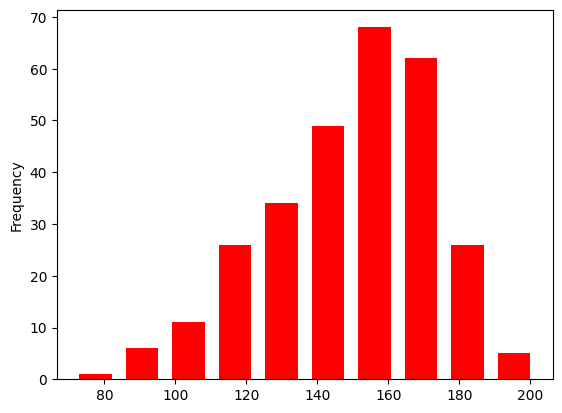

In [ ]:
 infarto['thalach'].plot.hist(rwidth=0.7 , color='red')





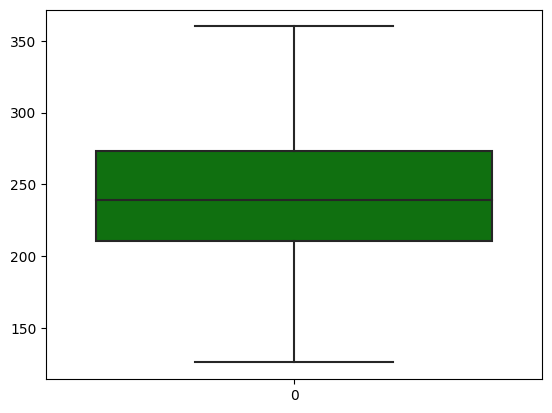

In [ ]:
#Boxplot: gráfico utilizado para avaliar a distribuição empírica do dados
ax = sns.boxplot(data=infarto['chol'], color='green')


In [ ]:
#Instâncias consideradas outliers
outliers = boxplot_stats(infarto["chol"]).pop(0)['fliers']
np.where(infarto["chol"].isin(outliers))

(array([ 28,  85,  96, 220, 246]),)

In [ ]:
#Retirando os outliers
infarto.drop(np.where(infarto["chol"].isin(outliers))[0], inplace=True)

<Axes: >

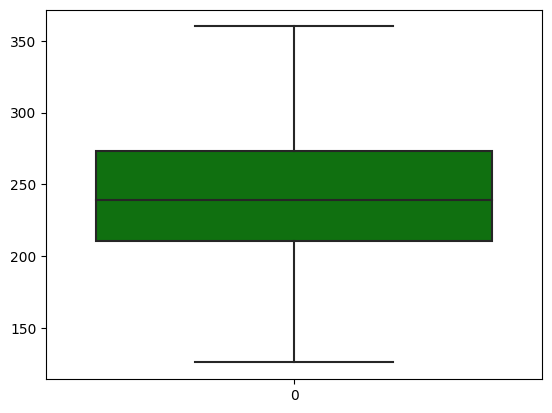

In [ ]:

#Novo boxplot
sns.boxplot(data=infarto['chol'], color='green')

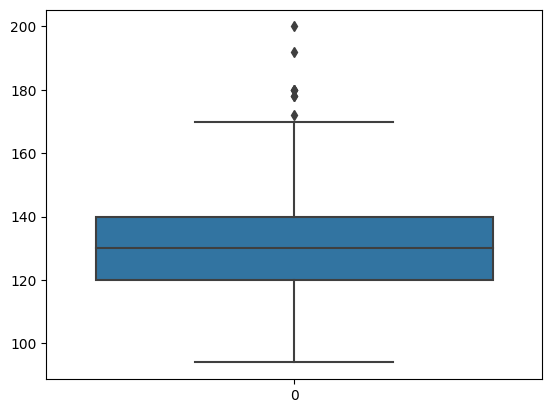

In [ ]:
bx = sns.boxplot(data=infarto['trestbps'])

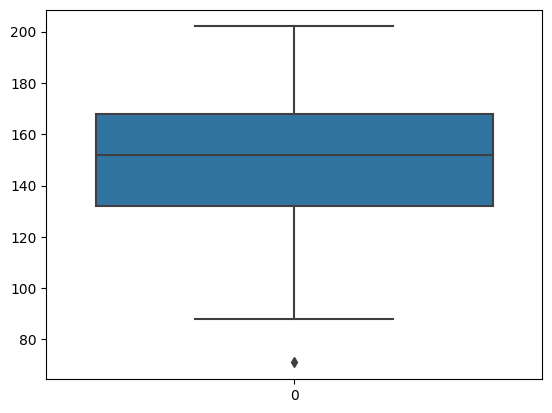

In [ ]:
bx = sns.boxplot(data=infarto['thalach'])

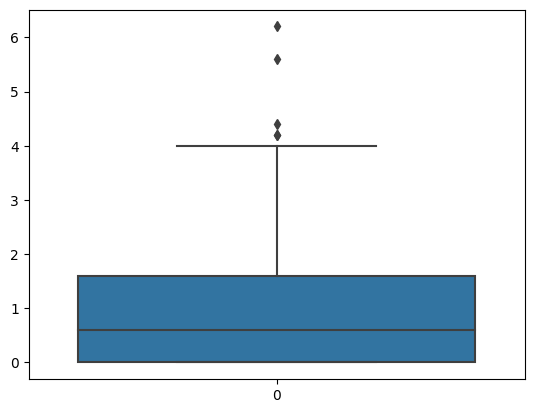

In [ ]:
bx = sns.boxplot(data=infarto['oldpeak'])

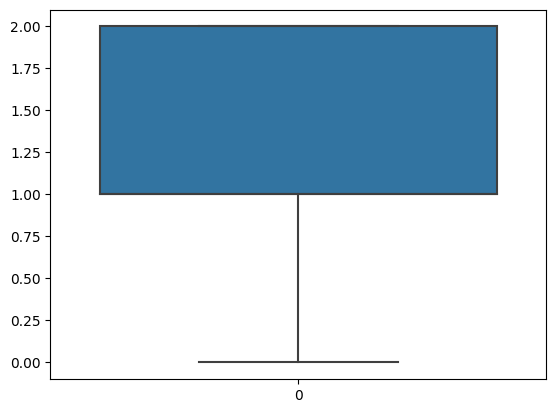

In [ ]:
bx = sns.boxplot(data=infarto['slope'])

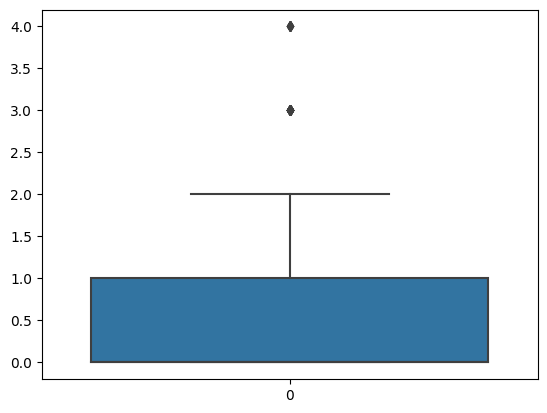

In [ ]:
bx = sns.boxplot(data=infarto['ca'])

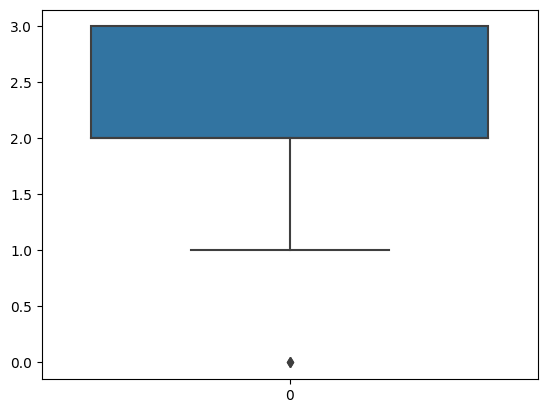

In [ ]:
bx = sns.boxplot(data=infarto['thal'])

In [ ]:
#Instâncias consideradas outliers
outliers = boxplot_stats(infarto["trestbps"]).pop(0)['fliers']
np.where(infarto["trestbps"].isin(outliers))

(array([  8, 101, 110, 203, 223, 241, 248, 260, 266]),)

In [ ]:
#Retirando os outliers
infarto.drop(np.where(infarto["trestbps"].isin(outliers))[0], inplace=True)

<Axes: >

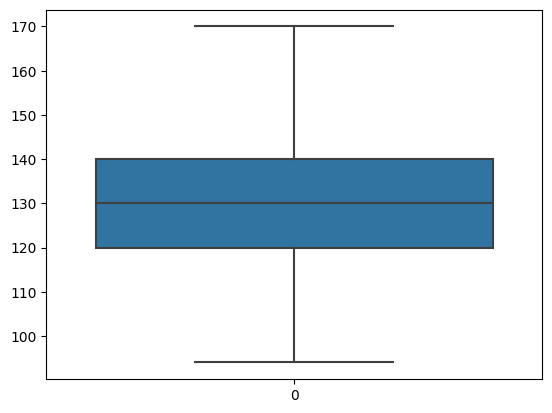

In [ ]:

#Novo boxplot
sns.boxplot(data=infarto['trestbps'])

In [ ]:
#Verificação do tamanho da matriz
infarto.shape


(294, 13)

# Usando sklearn

In [ ]:
# loading the necessary functions
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# creating train/test validation
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
y = infarto['target']
infarto = infarto.drop(['target'], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(infarto, y, test_size=0.1, random_state=42,
                                                 stratify=y, shuffle=True)

In [ ]:
# setting the hyperparameter k=10
#Default distance metric: Minkowski
lazy = KNeighborsClassifier(n_neighbors = 10)

In [ ]:
# start modeling the problem
# as this algorithm is lazy, the model is basically storing the KB
lazy.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
# lets check the performance of our model by classifying new examples
# Return the mean accuracy on the given test data and labels
lazy.score(X_test, y_test)

0.7096774193548387

In [ ]:
#Different distance metrics
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics
lazy = KNeighborsClassifier(n_neighbors = 5, metric='manhattan')


In [ ]:
lazy.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan')

In [ ]:
# Mean accuracy
lazy.score(X_test, y_test)

0.7096774193548387

In [ ]:
# Predicted labels
y_predicted = lazy.predict(X_test)
y_predicted

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1])

In [ ]:
cm = confusion_matrix(y_test, y_predicted)
print("Confusion matrix")
print(cm)

Confusion matrix
[[ 9  6]
 [ 3 13]]


In [ ]:
cr = classification_report(y_test, y_predicted)
print("Classification report")
print(cr)

Classification report
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        15
           1       0.68      0.81      0.74        16

    accuracy                           0.71        31
   macro avg       0.72      0.71      0.70        31
weighted avg       0.72      0.71      0.71        31



In [ ]:
#support is the number of occurrences of each label in y_test

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_predicted).ravel()
tn, fp, fn, tp

(9, 6, 3, 13)

In [ ]:
#Precisão
#Proporção de positivos classificados corretamente entre todos aqueles preditos como positivos
precision = tp/(tp + fp)
precision

0.6842105263157895

In [ ]:
#Proporção de negativos classificados corretamente entre todos aqueles preditos como negativos
precision_neg = tn/(tn + fn)
precision_neg

0.75

In [ ]:
#Especificidade
#Taxa de acerto na classe negativa

espec = tn/(tn + fp)
espec

0.6

In [ ]:
#Sensibilidade ou revocação
#Taxa de acerto na classe positiva

recall = tp/(tp + fn)
recall

0.8125

In [ ]:
f1 = (2*recall*precision)/(recall+precision)
f1

0.742857142857143

In [ ]:
f1 = (2*espec*precision_neg)/(espec+precision_neg)
f1

0.6666666666666665

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay


In [ ]:
# creating k-fold validation
infarto = pd.read_csv('heart.csv')
y = infarto['target']
X = infarto.drop(['target'], axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.1)


classifier = KNeighborsClassifier(n_neighbors = 3, metric='manhattan')


In [ ]:
scores = cross_val_score(classifier, X_train, y_train, cv=10)
np.mean(scores)

0.6796296296296296

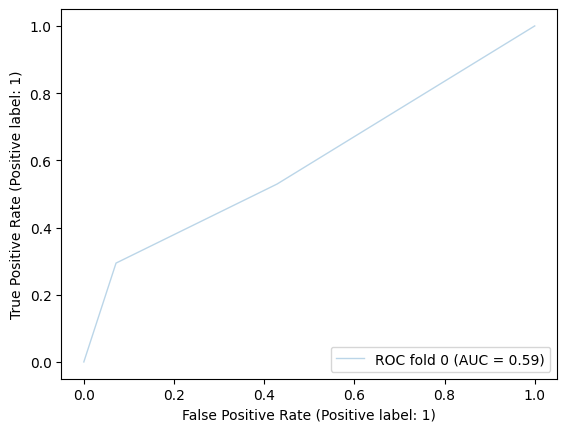

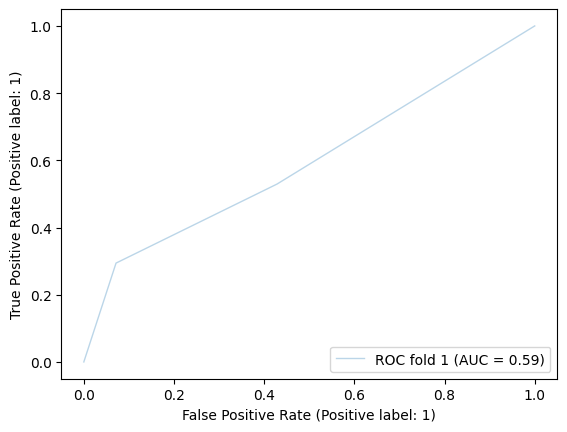

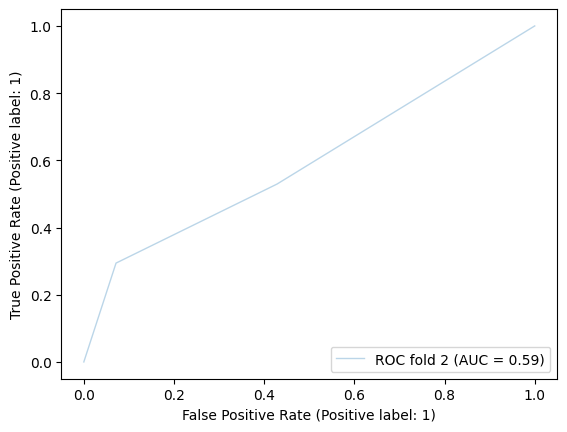

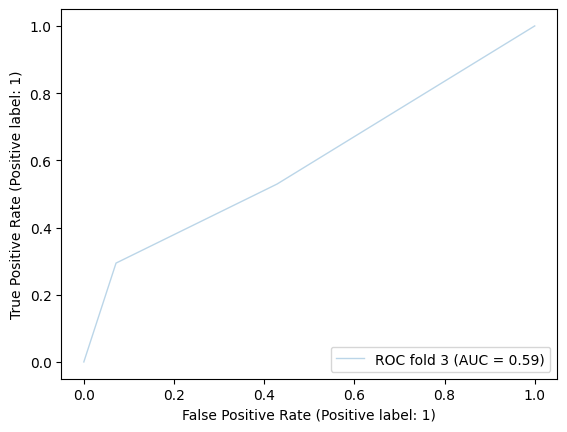

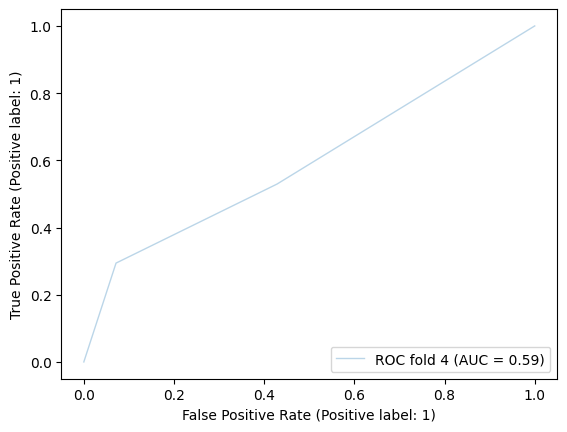

In [ ]:
cv = StratifiedKFold(n_splits=5)
classifier = KNeighborsClassifier(n_neighbors = 3, metric='manhattan')

for fold, (train, test) in enumerate(cv.split(X, y)):
  classifier.fit(X_train, y_train)
  viz = RocCurveDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
    )

##Tranformando um atributo categórico em atributo numérico (Pode ser utilizado em problemas de mais de duas classes)

In [1]:
import pandas as pd
#Carregando a base
data_new = pd.read_csv('ds_salaries.csv',)

FileNotFoundError: ignored

In [ ]:
#Escolhendo o atributo a ser tranformado
df_exp = pd.get_dummies(data_new['experience_level'])
df_new = pd.concat([data_new, df_exp], axis=1)
print(df_new)

In [ ]:
#Criando uma base com os novos atributos
data_final =df_new.drop(['experience_level'], axis = 1)

In [ ]:
data_final